In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.io as sci
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from pathlib import Path
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
# from keras import losses, optimizers,layers
# from keras.layers import Conv2D, Flatten, BatchNormalization  # we have 2D images 
# from keras.layers import Dense, ReLU 
# from keras.models import Sequential
import os
from scipy.io import loadmat
from sklearn.model_selection import train_test_split, KFold

In [2]:
import warnings

if not tf.test.gpu_device_name():
    warnings.warn('No GPU found')

else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

<ipython-input-2-e08102dfe8f7>:4: UserWarning: No GPU found
  warnings.warn('No GPU found')


In [3]:
# load data
NumberData = loadmat("NumberRecognitionBigger.mat")

#extract images and label from dictionary
images = NumberData['X']
label = NumberData['y']

images = np.transpose(images,[2,0,1])
images = images.reshape(images.shape[0], 28, 28, 1)

label = np.transpose(label)
print(f"shape of images is: {images.shape} \nshape of label is: {label.shape}")

shape of images is: (30000, 28, 28, 1) 
shape of label is: (30000, 1)


In [4]:
# # create training, validation, testing sets and scale them

# X_train_all, X_test, y_train_all, y_test = train_test_split(images, label, test_size=0.20)

# X_val, X_train = X_train_all[:5000] / 255.0, X_train_all[5000:] / 255.0
# y_val, y_train = y_train_all[:5000], y_train_all[5000:]
# X_test = X_test/255


# #no scaling
# # X_val, X_train = X_train_all[:5000], X_train_all[5000:]
# # y_val, y_train = y_train_all[:5000], y_train_all[5000:]

# print(f"shape of X_train is: {X_train.shape} \nshape of y_train is: {y_train.shape} \nshape of X_test is: {X_test.shape} \nshape of X_test is: {y_test.shape} \nshape of X_val is: {X_val.shape} \nshape of y_val is: {y_val.shape}")


In [5]:
num_classes = 10
kFoldVal = KFold(n_splits=5, random_state=42, shuffle= True)
for trainIndex, testIndex in kFoldVal.split(images):
    x_train_full, x_test, y_train_full, y_test = images[trainIndex], images[testIndex], label[trainIndex], label[testIndex]
    
    x_train, x_test, y_train, y_test = x_train_full[:16000] / 255.0, x_test / 255.0, y_train_full[:16000], y_test
    x_val, y_val = x_train_full[16000:] / 255.0 , y_train_full[16000:]
    # convert class vectors to binary class matrices
    y_val = keras.utils.to_categorical(y_val, num_classes)
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    print(x_train.shape)
    print(x_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    # architecture reference : https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist
    #model is build via sequential
    model = tf.keras.models.Sequential()

    #add convolution layer
    model.add(tf.keras.layers.Conv2D(32, kernel_size=3, input_shape=(28,28,1), activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(32, kernel_size=5, strides=2, input_shape=(28,28,1), activation="relu", padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.4))

    #add convolution layer
    model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), activation="relu", padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=128, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.4))
        
    # Finish with 10 softmax output nodes
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))# multiclass classification output, use softmax
    model.summary()

print(f"shape of x_train is: {x_train.shape} \nshape of y_train is: {y_train.shape} \nshape of x_test is: {x_test.shape} \nshape of X_test is: {y_test.shape}\n shape of x_val is: {x_val.shape} shape of y_val is: {y_val.shape}")



(16000, 28, 28, 1)
(6000, 28, 28, 1)
(16000, 10)
(6000, 10)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
______________________________________________________________

(16000, 28, 28, 1)
(6000, 28, 28, 1)
(16000, 10)
(6000, 10)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_21 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_23 (Batc (None, 12, 12, 32)        128       
____________________________________________________________

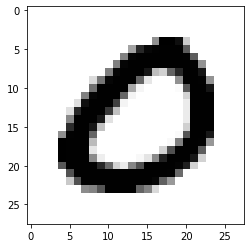

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


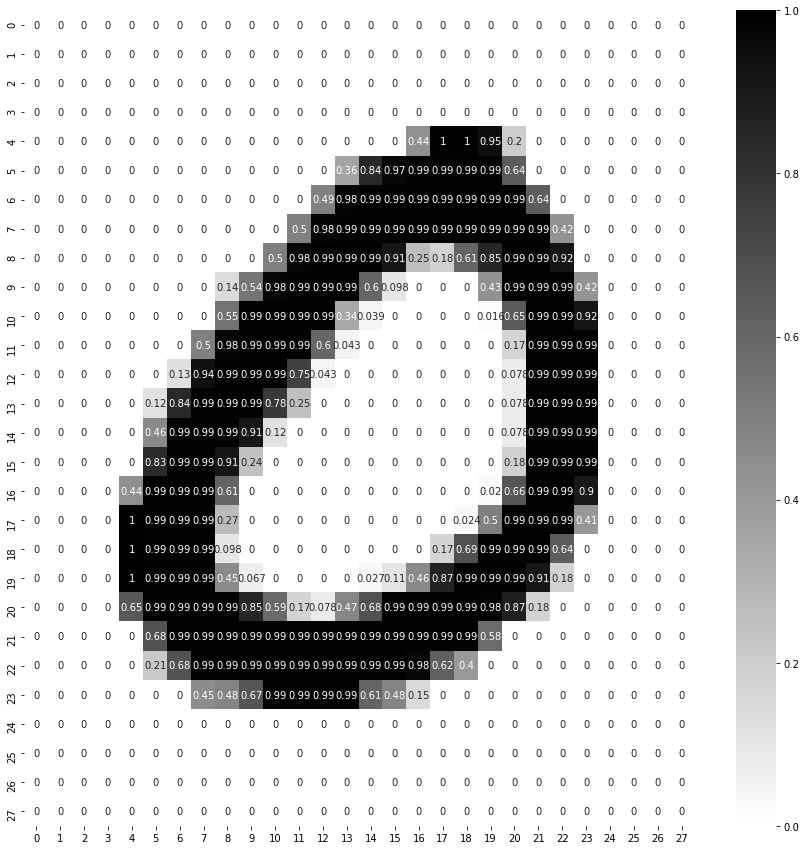

In [6]:
x_train.shape
y_train.shape
# lets view the first data point of X_train
plt.imshow(np.reshape(x_train[5000],[28,28]), cmap="binary")
plt.show()
plt.figure(figsize=(15,15))
sbn.heatmap(np.reshape(x_train[5000], [28,28]), annot=True, cmap="binary")
print(y_train[5000])

In [7]:
#check weights and biases

# hidden1 = model.layers[2]
# hidden1.get_weights()
# weights, biases = hidden1.get_weights()
# print("shape\n",weights.shape, "\n")

# biases

In [8]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
import time

def get_log_path(log_dir="logs/fit"):
    fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")    
    log_path = os.path.join(log_dir, fileName)
    print(f"saving logs at:\n{log_path}")
    return log_path

log_dir = get_log_path()
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


EPOCHS = 15
VALIDATION_SET = (x_val, y_val)

history = model.fit(x_train, y_train, epochs=EPOCHS, verbose=1, validation_data=VALIDATION_SET, callbacks=tensorboard_callback)


saving logs at:
logs/fit/log_2021_01_08_12_49_59
Epoch 1/15
  1/500 [..............................] - ETA: 0s - loss: 3.7393 - accuracy: 0.1250WARNING:tensorflow:From /usr/lib/python3/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
500/500 [==============================] - 17s 34ms/step - loss: 0.4181 - accuracy: 0.8706 - val_loss: 0.4714 - val_accuracy: 0.8535
Epoch 2/15
500/500 [==============================] - 17s 33ms/step - loss: 0.1290 - accuracy: 0.9597 - val_loss: 0.0686 - val_accuracy: 0.9793
Epoch 3/15
500/500 [==============================] - 17s 33ms/step - loss: 0.0888 - accuracy: 0.9736 - val_loss: 0.0714 - val_accuracy: 0.9786
Epoch 4/15
500/500 [==============================] - 17s 33ms/step - loss: 0.0790 - accuracy: 0.9769 - val_loss: 0.0435 - val_accuracy: 0.9876
Epoch 5/15
500/500 [=

In [10]:
# save the model
import time
import os

def save_Model_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"Model save at\n{model_path}")
    return model_path

path = model.save(save_Model_path())

Model save at
SAVED_MODELS/Model_2021_01_08_12_54_09_.h5


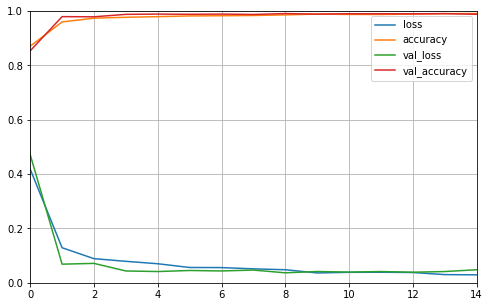

In [11]:
history_params = pd.DataFrame(history.history)
history_params

history_params.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
# test the model

model.evaluate(x_test,y_test)

188/188 [==============================] - 1s 7ms/step - loss: 0.0440 - accuracy: 0.9885


[0.044036854058504105, 0.9884999990463257]

In [13]:
#test new data

X_test_new = x_test[:10]
y_test_new = y_test[:10]
y_proba = model.predict(X_test_new)
y_proba.round(2)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
"""
# test using real data
import cv2
import matplotlib.image as mpimg



def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.2989, 0.5870, 0.1140])

                  
img = mpimg.imread("four.png")
# img = mpimg.imread("one.png")
im = cv2.resize(img, (28,28))
gray = rgb2gray(im)
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

gray = gray.reshape(1,28,28,1)
gray = gray
gray.shape

"""

'\n# test using real data\nimport cv2\nimport matplotlib.image as mpimg\n\n\n\ndef rgb2gray(rgb):\n    return np.dot(rgb[...,:3],[0.2989, 0.5870, 0.1140])\n\n                  \nimg = mpimg.imread("four.png")\n# img = mpimg.imread("one.png")\nim = cv2.resize(img, (28,28))\ngray = rgb2gray(im)\nplt.imshow(gray, cmap=plt.get_cmap(\'gray\'), vmin=0, vmax=1)\nplt.show()\n\ngray = gray.reshape(1,28,28,1)\ngray = gray\ngray.shape\n\n'

In [15]:
y_pred = np.argmax(model.predict(X_test_new), axis=-1)


# y_pred = np.argmax(model.predict(gray), axis=-1)

y_pred
# print(y_test_new)

array([2, 0, 9, 4, 5, 0, 2, 8, 6, 1])

In [16]:
# for data, pred, actual in zip(X_test_new, y_pred, y_test_new):
    
#     plt.imshow(np.reshape(data,[28,28]))
#     actual = np.where(actual==1)
#     # print(actual)
#     plt.title(f"Predicted: {pred}, Actual: {actual[0]}")
# plt.show()
# print("****"*10)


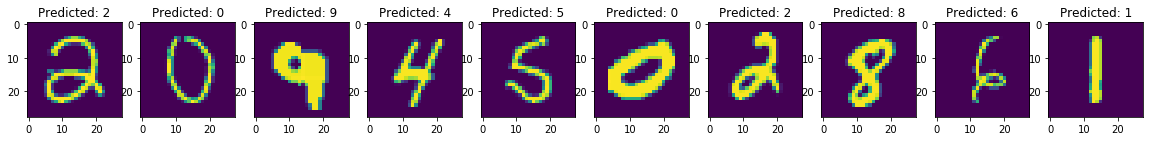

In [17]:
plt.figure(figsize=(20,4))
for index, (data, pred, actual) in enumerate(zip(X_test_new, y_pred, y_test_new)):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(data, (28,28)))
    actual = np.where(actual==1)
    plt.title(f"Predicted: {pred}")
    
plt.show()

In [18]:
%load_ext tensorboard

In [19]:
%reload_ext tensorboard